<a href="https://colab.research.google.com/github/priyanka0178885547/ML-LAB/blob/main/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [349]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
from sklearn.feature_selection import SelectKBest, mutual_info_classif


In [350]:
df=pd.read_csv("/content/Student Mental health.csv")

In [351]:
df.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [352]:
[col for col in df.columns if df[col].isnull().sum() >0]# checking for the null values

['Age']

In [353]:
df = df.dropna(subset=['Age'])

In [354]:
 [col for col in df.columns if df[col].isnull().sum() >0]

[]

In [355]:
X=df.drop(labels=['Do you have Depression?'],axis=1)#input variables
y=df['Do you have Depression?']#output variables

In [356]:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [357]:
constant_features=[features for features in x_train.columns if x_train[features].std()==0]

TypeError: could not convert string to float: '8/7/2020 16:53'

Constant Features


In [358]:
   X=pd.get_dummies(X,drop_first=True)# Converting string into float

pd.get_dummies is used to convert categorical values into numerical values(one hot encoding)

In [360]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



In [361]:
constant_features=[features for features in x_train.columns if x_train[features].std()==0]

In [362]:
len(constant_features)


40

In [363]:
x_train.drop(labels=constant_features,axis=1,inplace=True)
x_test.drop(labels=constant_features,axis=1,inplace=True)

Quasi constant feature

extracting the columns where 99.9% values are same

In [364]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [365]:
quasi_constant_feat=[] # stores the features in the list


In [366]:
for feature in x_train.columns:#iterates through each and every columns
# it  tells you how many times each value appears and it divided number of rows and it gives frequency in descending order
  predominant=(x_train[feature].value_counts()/float(len(x_train))).sort_values(ascending=False).values[0]
  if predominant>0.999:
    quasi_constant_feat.append(feature)
len(quasi_constant_feat)



40

In [367]:
x_train.drop(labels=quasi_constant_feat,axis=1,inplace=True)
x_test.drop(labels=quasi_constant_feat,axis=1,inplace=True)


Duplicate features
 extracting the columns in the dataset have same values

In [303]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [368]:
duplicated_feet=[]
for i in range(0,len(x_train.columns)):
  col_1=x_train.columns[i]
  for col_2 in x_train.columns[i+1:]:
    if x_train[col_1].equals(x_train):
       duplicated_feat.append(col_2)

In [369]:
duplicated_features=set(duplicated_feet)# it is used to get unique values
print(len(duplicated_feet))

0


Correlation



Correlation it shows how strongly variables are stronly connected


In [370]:
grouped_feature_ls=[]
correlated_groups=[]
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
          if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
            colname = corr_matrix.columns[i]  # getting the name of column
            col_corr.add(colname)
    return col_corr

In [371]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [372]:
corr_features=correlation(x_train,0.7)
correlated_features=set(corr_features)
print(len(correlated_features))

33


In [373]:
x_train.drop(labels=correlated_features,axis=1,inplace=True)
x_test.drop(labels=correlated_features,axis=1,inplace=True)
x_train.shape,x_test.shape

((70, 122), (30, 122))

Mutual Information
MI is calculated for each of the predictors and its relationship with the target variable.



<Axes: >

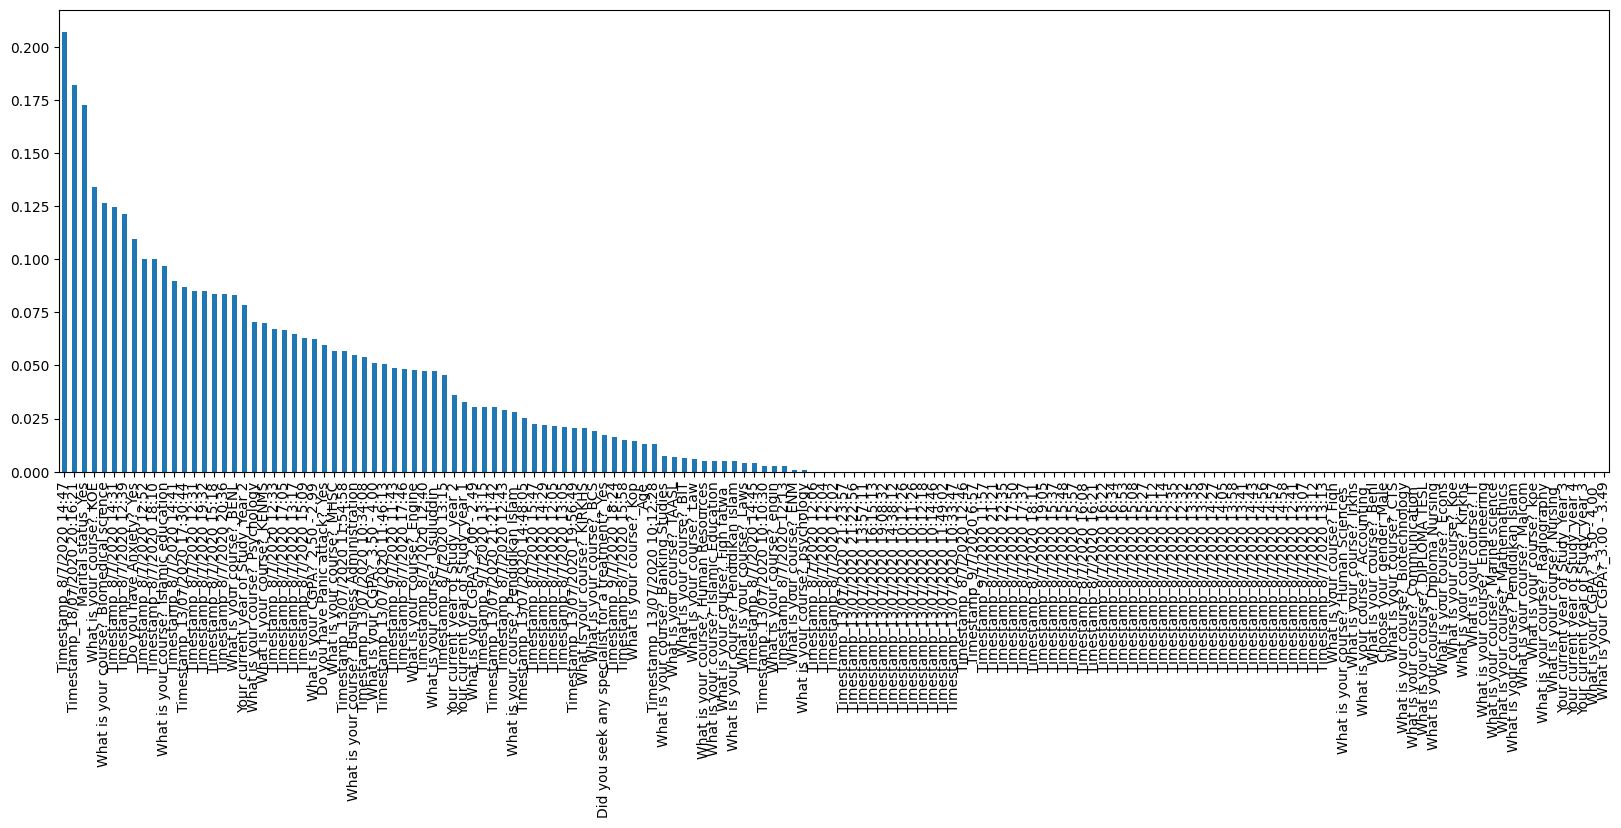

In [309]:
mi = mutual_info_classif(x_train.fillna(0), y_train)
mi = pd.Series(mi)
mi.index = x_train.columns
mi.sort_values(ascending=False)
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))

In [310]:
sel_ = SelectKBest(mutual_info_classif, k=10).fit(x_train.fillna(0), y_train)
x_train.columns[sel_.get_support()]


Index(['Timestamp_13/07/2020 10:12:26', 'Timestamp_13/07/2020 11:54:58',
       'Timestamp_13/07/2020 21:23:57', 'Timestamp_8/7/2020 12:02',
       'Timestamp_8/7/2020 12:43', 'Timestamp_8/7/2020 13:15',
       'Timestamp_8/7/2020 15:12', 'What is your course?_Biotechnology',
       'What is your course?_Econs', 'Marital status_Yes'],
      dtype='object')

<Axes: >

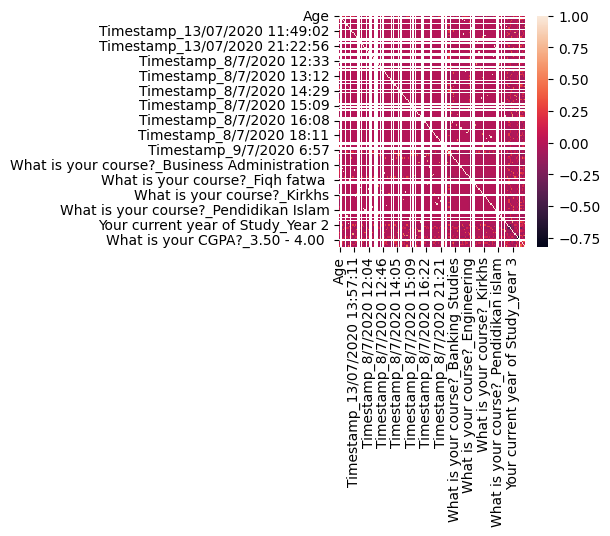

In [311]:
corrmat = x_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(3,3)
sns.heatmap(corrmat)

In [63]:
df1=pd.read_csv("/content/Student Mental health.csv") #loading the dataset
df1.shape

(101, 11)

In [64]:
[col for col in df1.columns if df1[col].isnull().sum()>0] #check if there is null data


['Age']

In [65]:
X2=df.drop(labels=['Do you have Depression?'],axis=1)#input variables
y2=df['Do you have Depression?']#output variables

In [66]:
 X2=pd.get_dummies(X2,drop_first=True)#encoding the output varaibles to avoid the error

In [67]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=0)

<Axes: >

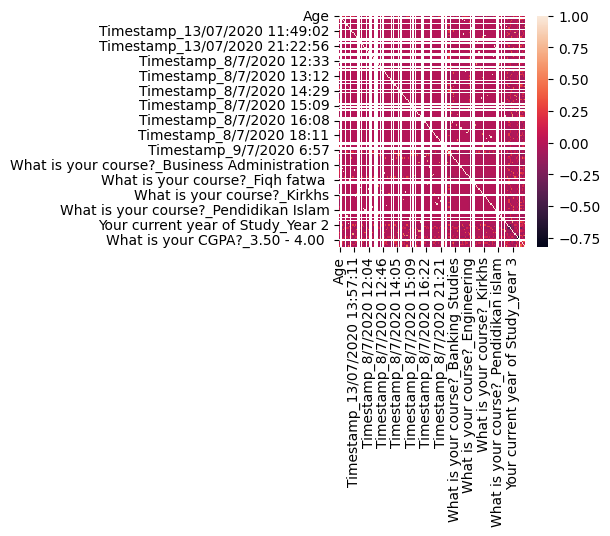

In [69]:
corrmat = x_train2.corr()
fig, ax = plt.subplots()
fig.set_size_inches(3,3)
sns.heatmap(corrmat)


In [73]:
df2=pd.read_csv("/content/House Price India.csv") #loading the dataset
df2.shape

(14619, 23)

In [74]:
 [col for col in df2.columns if df2[col].isnull().sum() >0]

[]

In [75]:
df2.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [76]:
X = df2.drop(labels=['living area'], axis=1)  # input variables
y = df2['living area']  # output variables

In [77]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [78]:
# Constant features
constant_features=[features for features in x_train.columns if x_train[features].std()==0]

In [79]:
len(constant_features)

0

In [80]:
x_train.drop(labels=constant_features,axis=1,inplace=True)
x_test.drop(labels=constant_features,axis=1,inplace=True)

In [81]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [82]:
# Quasi constant features
quasi_constant_feat=[] # stores the features in the list

In [83]:
for feature in x_train.columns:#iterates through each and every columns
# it  tells you how many times each value appears and it divided number of rows and it gives frequency in descending order
  predominant=(x_train[feature].value_counts()/float(len(x_train))).sort_values(ascending=False).values[0]
  if predominant>0.999:
    quasi_constant_feat.append(feature)
len(quasi_constant_feat)


0

In [84]:
x_train.drop(labels=quasi_constant_feat,axis=1,inplace=True)
x_test.drop(labels=quasi_constant_feat,axis=1,inplace=True)


In [85]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [86]:
# Duplicated features
duplicated_feet=[]
for i in range(0,len(x_train.columns)):
  col_1=x_train.columns[i]
  for col_2 in x_train.columns[i+1:]:
    if x_train[col_1].equals(x_train):
       duplicated_feat.append(col_2)

In [87]:
duplicated_features=set(duplicated_feet)# it is used to get unique values
print(len(duplicated_feet))

0


In [88]:
# Correlation
grouped_feature_ls=[]
correlated_groups=[]
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
          if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
            colname = corr_matrix.columns[i]  # getting the name of column
            col_corr.add(colname)
    return col_corr

In [89]:
corr_features=correlation(x_train,0.7)
correlated_features=set(corr_features)
print(len(correlated_features))

4


<Axes: >

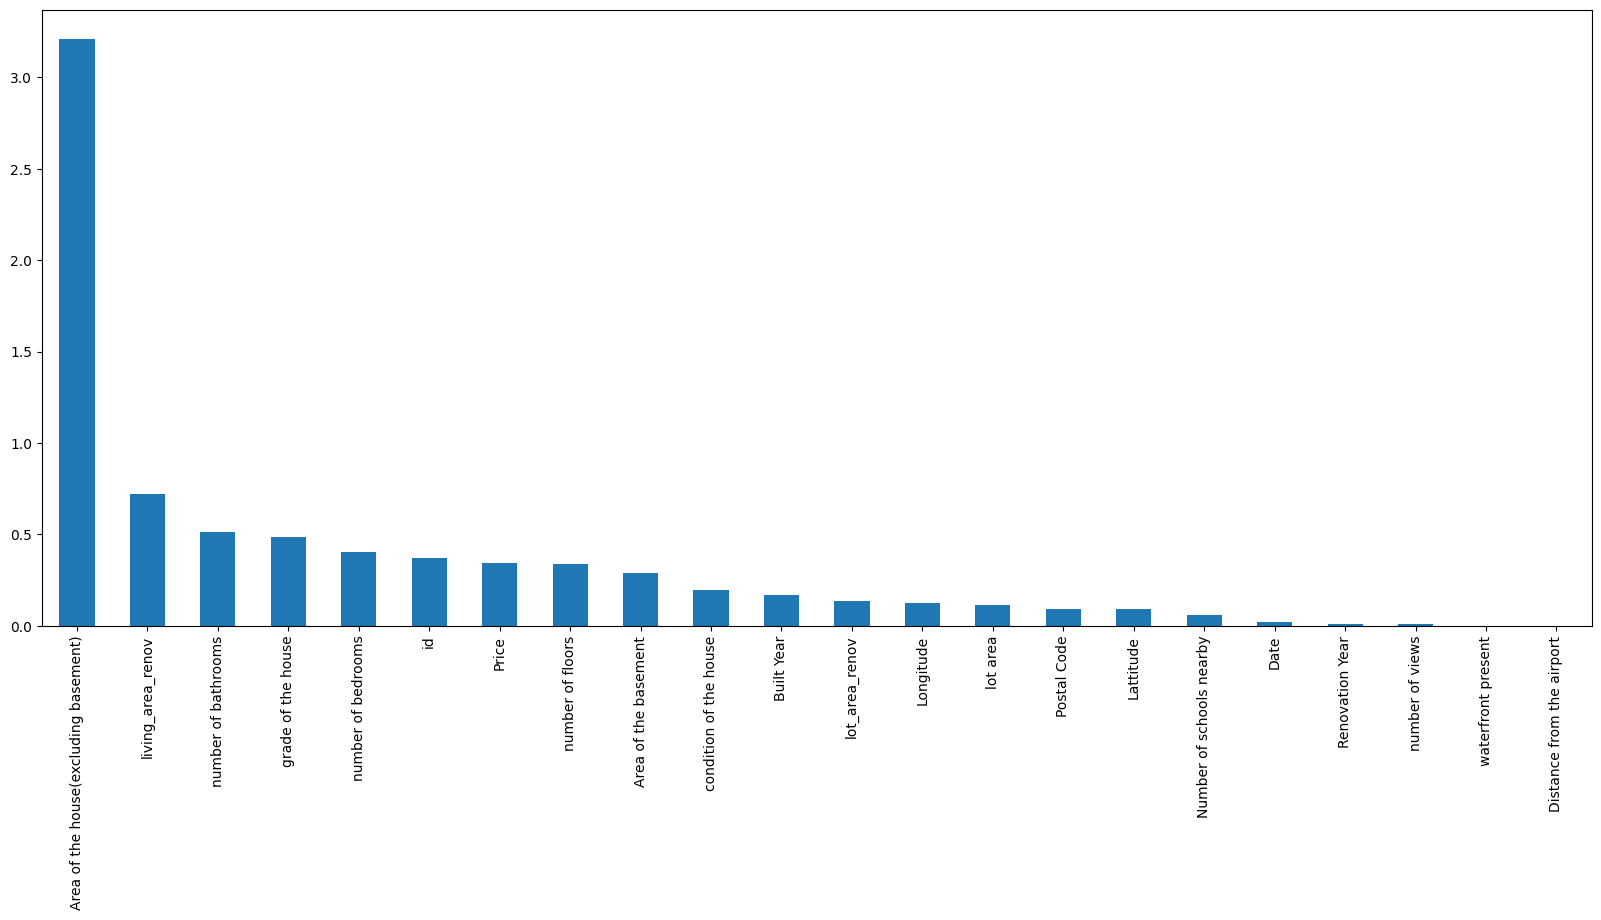

In [90]:
# Mutual Information
mi = mutual_info_classif(x_train.fillna(0), y_train)
mi = pd.Series(mi)
mi.index = x_train.columns
mi.sort_values(ascending=False)
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [91]:
sel_ = SelectKBest(mutual_info_classif, k=10).fit(x_train.fillna(0), y_train)
x_train.columns[sel_.get_support()]

Index(['id', 'number of bedrooms', 'number of bathrooms', 'number of floors',
       'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'living_area_renov', 'Price'],
      dtype='object')

<Axes: >

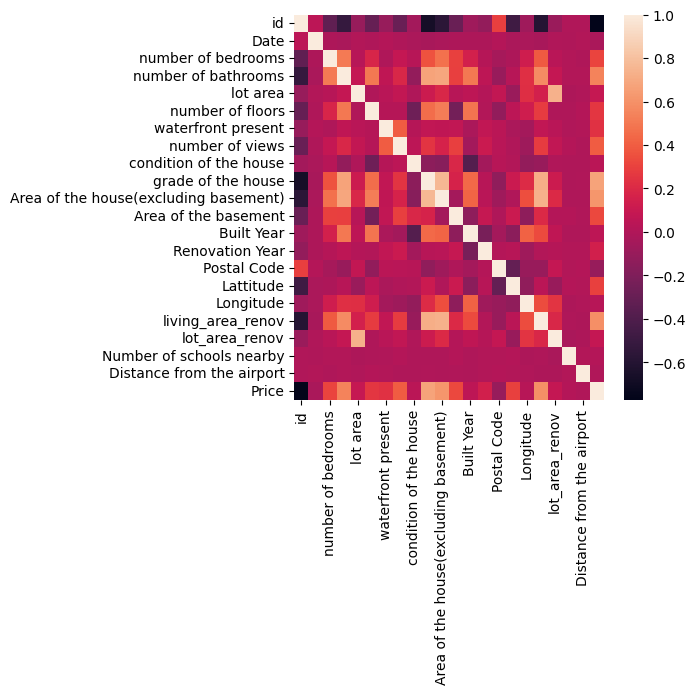

In [92]:
# HeatMap
corrmat = x_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
sns.heatmap(corrmat)


In [93]:
x_train.drop(labels=correlated_features,axis=1,inplace=True)
x_test.drop(labels=correlated_features,axis=1,inplace=True)
x_train.shape,x_test.shape

((10233, 18), (4386, 18))

In [329]:
df4=pd.read_csv("/content/Indian_Kids_Screen_Time.csv")
df4.shape

(9712, 8)

In [330]:
[col for col in df4.columns if df4[col].isnull().sum() >0]

['Health_Impacts']

In [331]:
df4.columns

Index(['Age', 'Gender', 'Avg_Daily_Screen_Time_hr', 'Primary_Device',
       'Exceeded_Recommended_Limit', 'Educational_to_Recreational_Ratio',
       'Health_Impacts', 'Urban_or_Rural'],
      dtype='object')

In [332]:
df4 = df4.dropna(subset=['Health_Impacts'])

In [333]:
X = df4.drop(labels=['Avg_Daily_Screen_Time_hr'], axis=1)  # input variables
y = df4['Exceeded_Recommended_Limit']
# output variables

In [334]:
X=pd.get_dummies(X,drop_first=True)

In [335]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [336]:
constant_features=[features for features in x_train.columns if x_train[features].std()==0]

In [337]:
len(constant_features)

1

In [338]:
x_train.drop(labels=constant_features,axis=1,inplace=True)
x_test.drop(labels=constant_features,axis=1,inplace=True)

In [339]:
# Quasi constant features
quasi_constant_feat=[] # stores the features in the list

In [340]:
for feature in x_train.columns:#iterates through each and every columns
# it  tells you how many times each value appears and it divided number of rows and it gives frequency in descending order
  predominant=(x_train[feature].value_counts()/float(len(x_train))).sort_values(ascending=False).values[0]
  if predominant>0.999:
    quasi_constant_feat.append(feature)
len(quasi_constant_feat)


0

In [341]:
x_train.drop(labels=quasi_constant_feat,axis=1,inplace=True)
x_test.drop(labels=quasi_constant_feat,axis=1,inplace=True)

In [342]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [343]:
# Duplicated features
duplicated_feet=[]
for i in range(0,len(x_train.columns)):
  col_1=x_train.columns[i]
  for col_2 in x_train.columns[i+1:]:
    if x_train[col_1].equals(x_train):
       duplicated_feat.append(col_2)

In [344]:
duplicated_features=set(duplicated_feet)# it is used to get unique values
print(len(duplicated_feet))

0


In [345]:
# Correlation
grouped_feature_ls=[]
correlated_groups=[]
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
          if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
            colname = corr_matrix.columns[i]  # getting the name of column
            col_corr.add(colname)
    return col_corr

In [346]:
corr_features=correlation(x_train,0.7)
correlated_features=set(corr_features)
print(len(correlated_features))

0


In [347]:
x_train.drop(labels=correlated_features,axis=1,inplace=True)
x_test.drop(labels=correlated_features,axis=1,inplace=True)
x_train.shape,x_test.shape

((4545, 22), (1949, 22))

<Axes: >

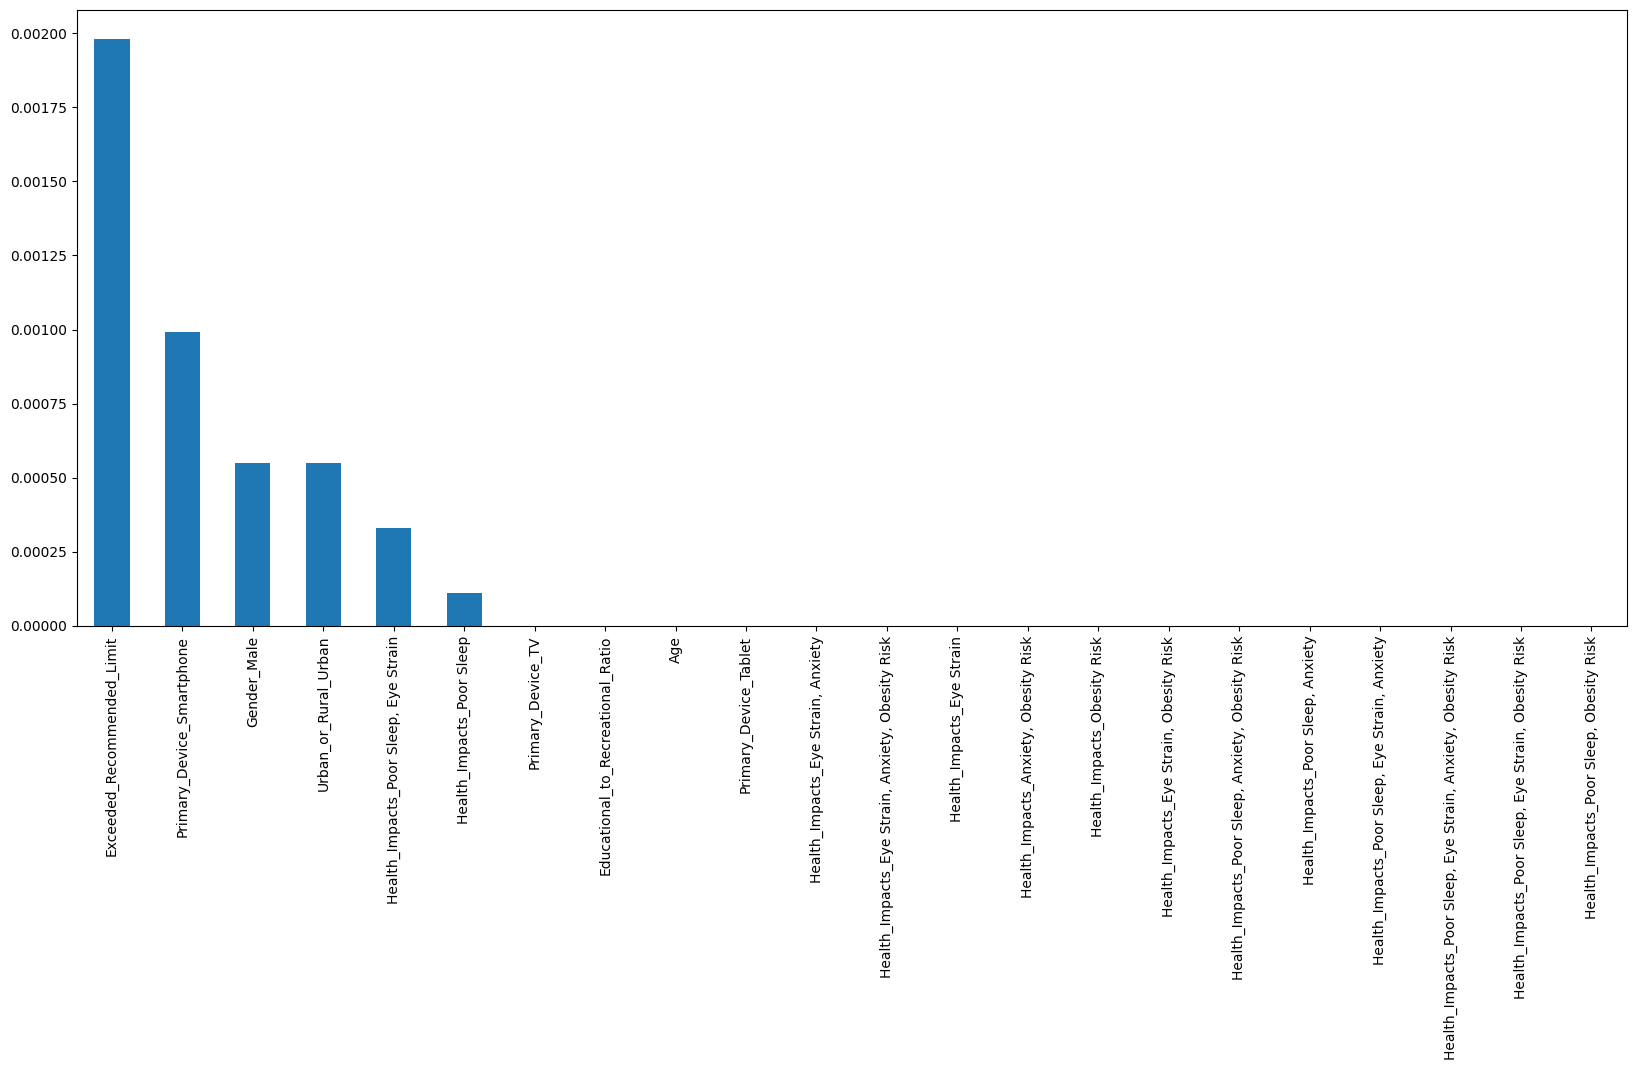

In [283]:
# Mutual Information
mi = mutual_info_classif(x_train.fillna(0), y_train)
mi = pd.Series(mi)
mi.index = x_train.columns
mi.sort_values(ascending=False)
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [284]:
sel_ = SelectKBest(mutual_info_classif, k=10).fit(x_train.fillna(0), y_train)
x_train.columns[sel_.get_support()]

Index(['Age', 'Exceeded_Recommended_Limit', 'Gender_Male',
       'Primary_Device_Smartphone', 'Primary_Device_TV',
       'Health_Impacts_Poor Sleep', 'Health_Impacts_Poor Sleep, Eye Strain',
       'Health_Impacts_Poor Sleep, Eye Strain, Obesity Risk',
       'Health_Impacts_Poor Sleep, Obesity Risk', 'Urban_or_Rural_Urban'],
      dtype='object')

<Axes: >

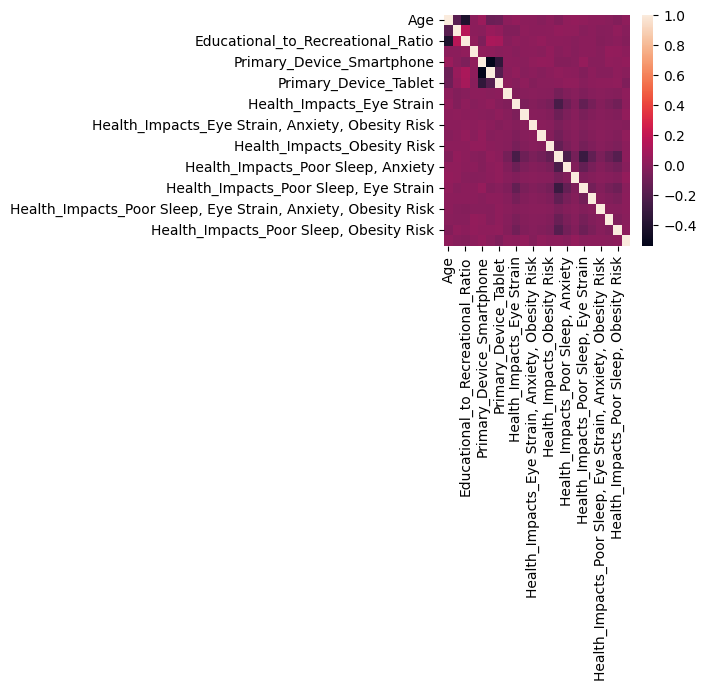

In [268]:
# HeatMap
corrmat = x_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(3,3)
sns.heatmap(corrmat)


In [313]:
df5=pd.read_csv("/content/Indian_Kids_Screen_Time.csv")
df5.shape

(9712, 8)

In [314]:
[col for col in df5.columns if df5[col].isnull().sum() >0]

[]

In [322]:
X2 = df5.drop(labels=['Avg_Daily_Screen_Time_hr'], axis=1)  # input variables
y2 = df5['Exceeded_Recommended_Limit']
# output variables

In [323]:
X2=pd.get_dummies(X2,drop_first=True)#encoding the output varaibles to avoid the error

In [324]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3,)

<Axes: >

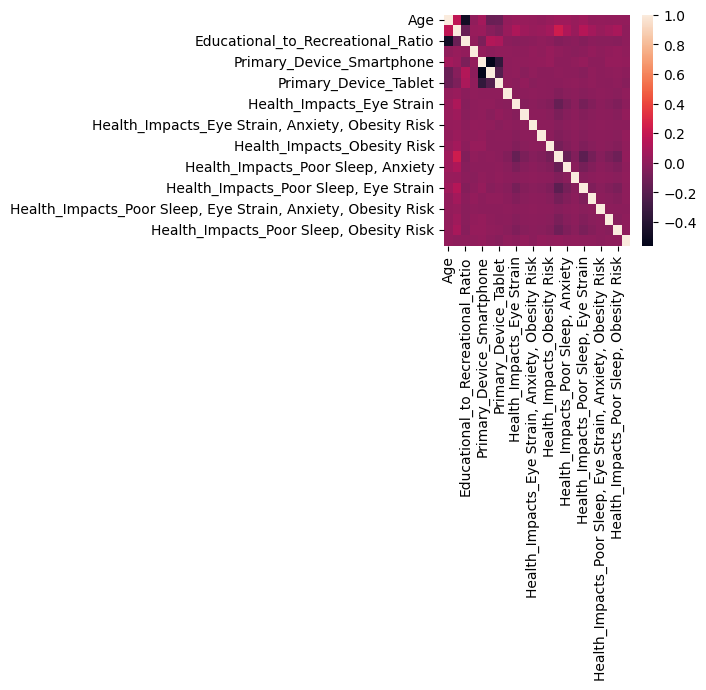

In [325]:
corrmat = x_train2.corr()
fig, ax = plt.subplots()
fig.set_size_inches(3,3)
sns.heatmap(corrmat)
